,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


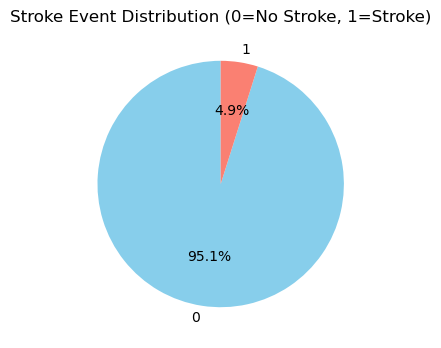

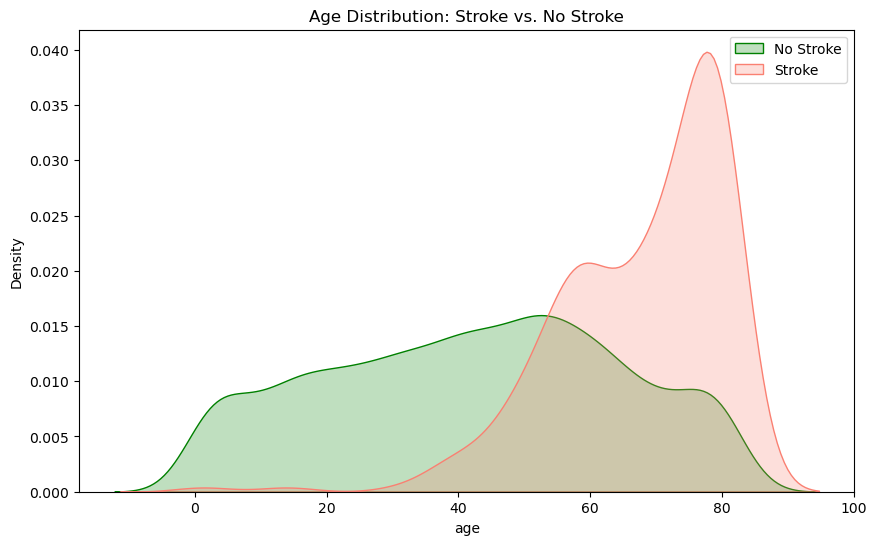

C:\Users\madar\AppData\Local\Temp\ipykernel_620\3006581787.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='coolwarm')


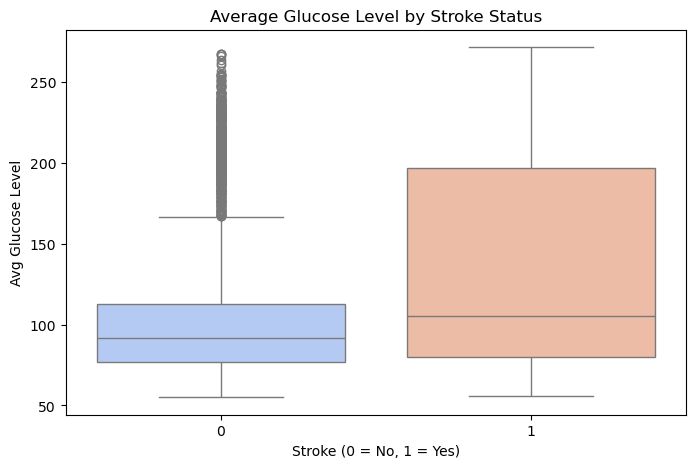

C:\Users\madar\AppData\Local\Temp\ipykernel_620\3006581787.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(skipna=True), inplace=True)
C:\Users\madar\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Training Shape: (7802, 10)
Testing Shape: (1022, 10)

MODEL PERFORMANCE REPORTS: 

Logistic Regression
Accuracy: 0.7583

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.17      0.76      0.28        62

    accuracy                           0.76      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.93      0.76      0.82      1022


Decision Tree
Accuracy: 0.8542

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       960
           1       0.11      0.19      0.14        62

    accuracy                           0.85      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.89      0.85      0.87      1022


K-Nearest Neighbors
Accuracy: 0.8190

Classification Report: 
              precision    recall  f1-score   support

           0       0.96   

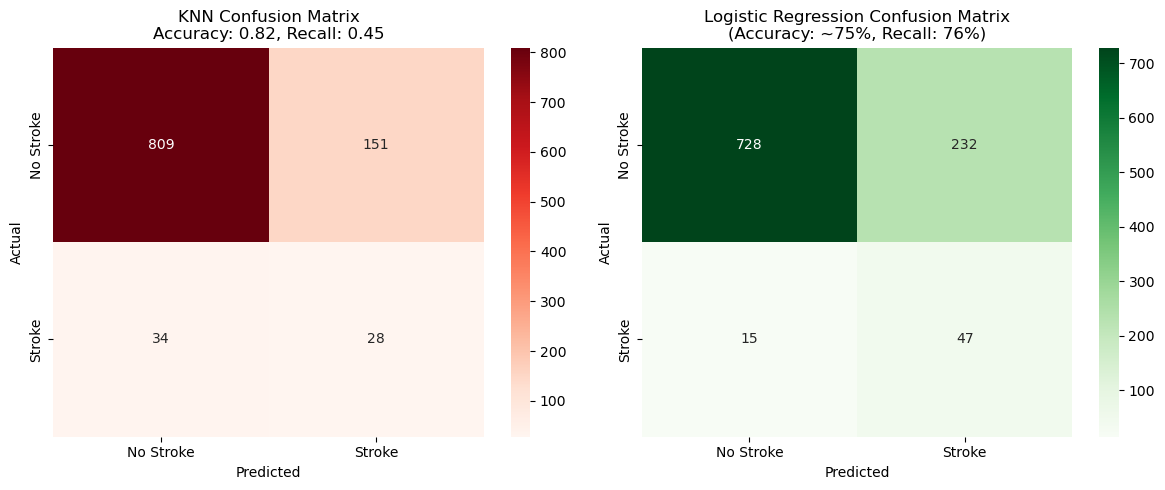

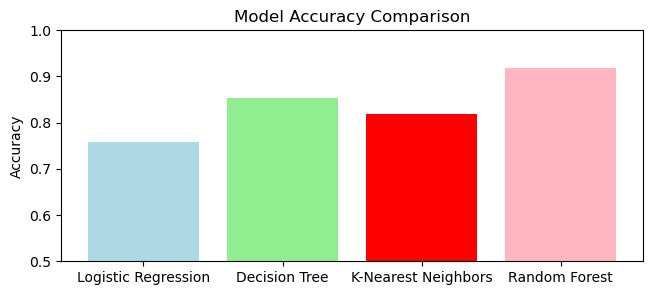

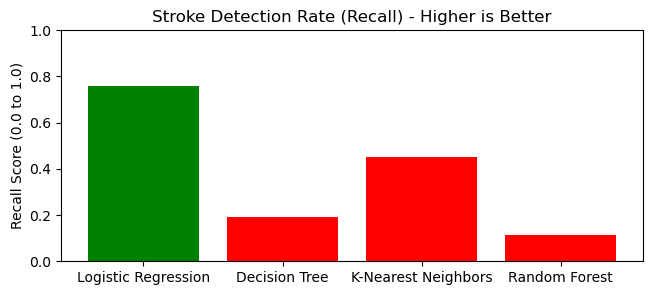


Best Model (Based on Recall): Logistic Regression


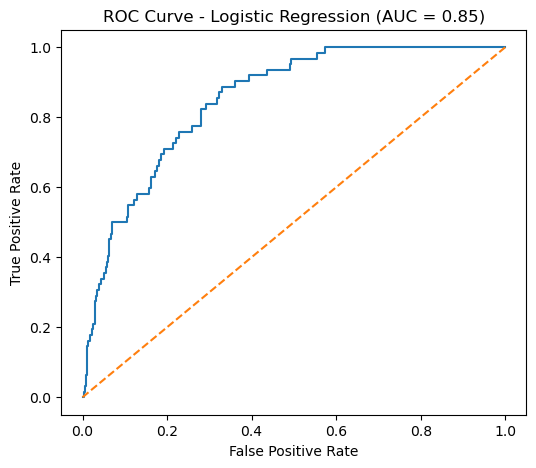

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

df = pd.read_csv(r"C:\Users\madar\OneDrive\Desktop\healthcare-dataset-stroke-data.csv")

display(df.head())
df.info()


df.isnull().sum()


#Stroke Distribution
plt.figure(figsize=(4,4))
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Stroke Event Distribution (0=No Stroke, 1=Stroke)')
plt.ylabel('')
plt.show()


#Age Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['stroke'] == 0], x='age', fill=True, color='green', label='No Stroke')
sns.kdeplot(data=df[df['stroke'] == 1], x='age', fill=True, color='salmon', label='Stroke')
plt.title('Age Distribution: Stroke vs. No Stroke')
plt.legend()
plt.show()


#Glucose vs Stroke
plt.figure(figsize=(8, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette='coolwarm')
plt.title('Average Glucose Level by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Avg Glucose Level')
plt.show()

#Data Preprocessing
df = df.drop('id', axis=1)
df.head()

#Handle Missing BMI
df['bmi'].fillna(df['bmi'].mean(skipna=True), inplace=True)


#Encode Categorical Columns
label_enc = LabelEncoder()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

#Feature & Target Split
X = df.drop('stroke', axis=1)
y = df['stroke']


#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


#Define Models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


#Train & Evaluate Models
results = {}
recall_results={}
y_prediction_values={}

print("\nMODEL PERFORMANCE REPORTS: ")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prediction_values[name]=y_pred
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    recall_results[name]=recall_score(y_test, y_pred=y_pred)
    
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    
    
    print("\nClassification Report: ")
    print(classification_report(y_test, y_pred))





# Generate Confusion Matrices
cm_knn = confusion_matrix(y_test, y_prediction_values['K-Nearest Neighbors'])
cm_lr = confusion_matrix(y_test, y_prediction_values['Logistic Regression'])

# Plot Side-by-Side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot KNN (The High Accuracy, Low Recall Model)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title(
    f"KNN Confusion Matrix\nAccuracy: {accuracy_score(y_test, y_prediction_values['K-Nearest Neighbors']):.2f}, "
    f"Recall: {recall_score(y_test, y_prediction_values['K-Nearest Neighbors']):.2f}"
)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Stroke', 'Stroke'])
axes[0].set_yticklabels(['No Stroke', 'Stroke'])

# Plot Logistic Regression (The Low Accuracy, High Recall Model)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix\n(Accuracy: ~75%, Recall: 76%)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['No Stroke', 'Stroke'])
axes[1].set_yticklabels(['No Stroke', 'Stroke'])

plt.tight_layout()
plt.show()

plt.figure(figsize=(7.5, 3))
plt.bar(results.keys(), results.values(), color=['lightblue', 'lightgreen', 'red', 'lightpink'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()

plt.figure(figsize=(7.5,3))
bars = plt.bar(recall_results.keys(), recall_results.values(), color=['green', 'red', 'red', 'red'])
plt.title('Stroke Detection Rate (Recall) - Higher is Better')
plt.ylabel('Recall Score (0.0 to 1.0)')
plt.ylim(0, 1.0)
plt.show()


#Select Best Model (Based on Recall)
best_model_name = max(recall_results, key=recall_results.get)
print("\nBest Model (Based on Recall):", best_model_name)

best_model = models[best_model_name]

#ROC Curve & AUC
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f"ROC Curve - {best_model_name} (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
